In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, pearsonr

# Load the cleaned dataset
file_path = 'cleaned_speeddating.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm the data
df.head()


,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,6.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,[2-5],...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,female,21.0,23.0,2.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,female,21.0,24.0,3.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,[2-5],...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


In [14]:
# Display value counts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())



Value Counts for gender:
gender
male      4194
female    4184
Name: count, dtype: int64

Value Counts for race:
race
European/Caucasian-American              4727
Asian/Pacific Islander/Asian-American    1982
Latino/Hispanic American                  664
Other                                     522
Black/African American                    420
?                                          63
Name: count, dtype: int64

Value Counts for race_o:
race_o
European/Caucasian-American              4722
Asian/Pacific Islander/Asian-American    1978
Latino/Hispanic American                  664
Other                                     521
Black/African American                    420
?                                          73
Name: count, dtype: int64

Value Counts for d_importance_same_race:
d_importance_same_race
[2-5]     3104
[0-1]     2885
[6-10]    2389
Name: count, dtype: int64

Value Counts for d_importance_same_religion:
d_importance_same_religion
[0-1]     3111
[2-5]     3013
[6-10]


Outlier Analysis:

age: 173 outliers detected
age_o: 173 outliers detected
d_age: 355 outliers detected
samerace: 0 outliers detected
importance_same_race: 0 outliers detected
importance_same_religion: 0 outliers detected
pref_o_attractive: 547 outliers detected
pref_o_sincere: 1169 outliers detected
pref_o_intelligence: 506 outliers detected
pref_o_funny: 733 outliers detected
pref_o_ambitious: 10 outliers detected
pref_o_shared_interests: 86 outliers detected
attractive_o: 8 outliers detected
sinsere_o: 122 outliers detected
intelligence_o: 53 outliers detected
funny_o: 14 outliers detected
ambitous_o: 148 outliers detected
shared_interests_o: 0 outliers detected
attractive_important: 549 outliers detected
sincere_important: 1170 outliers detected
intellicence_important: 506 outliers detected
funny_important: 734 outliers detected
ambtition_important: 10 outliers detected
shared_interests_important: 86 outliers detected
attractive: 20 outliers detected
sincere: 809 outliers detected

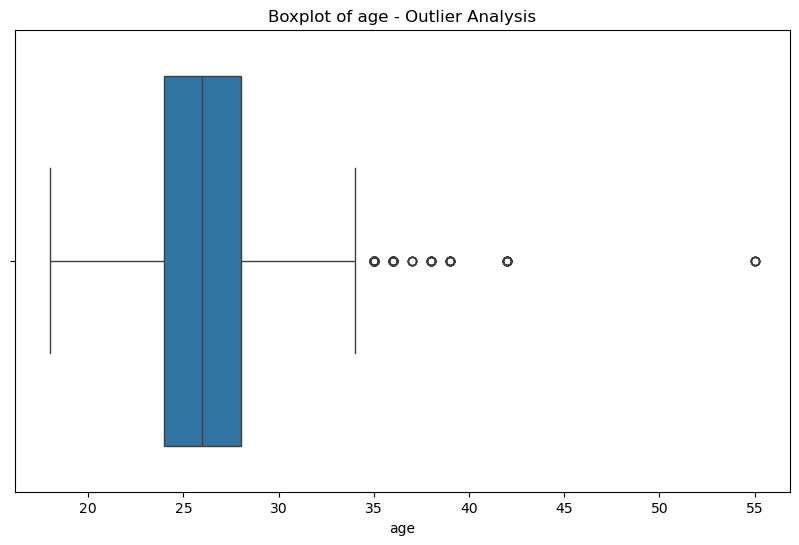

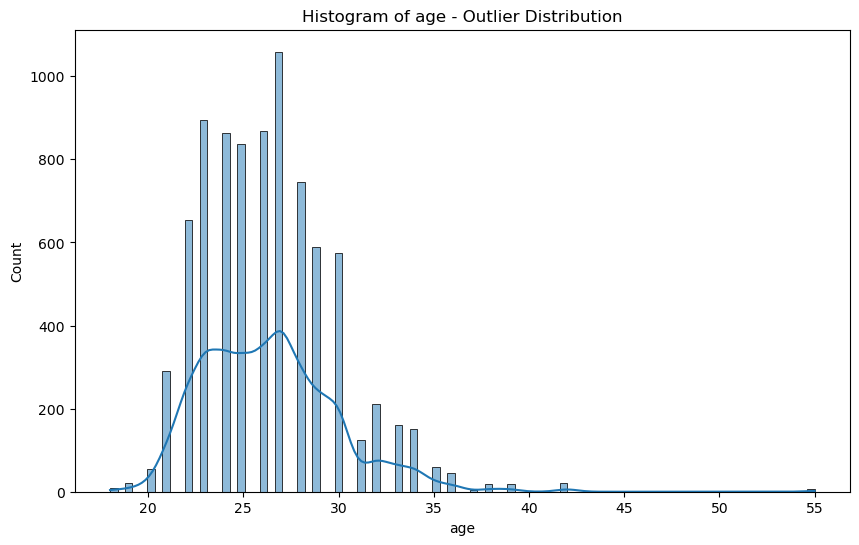

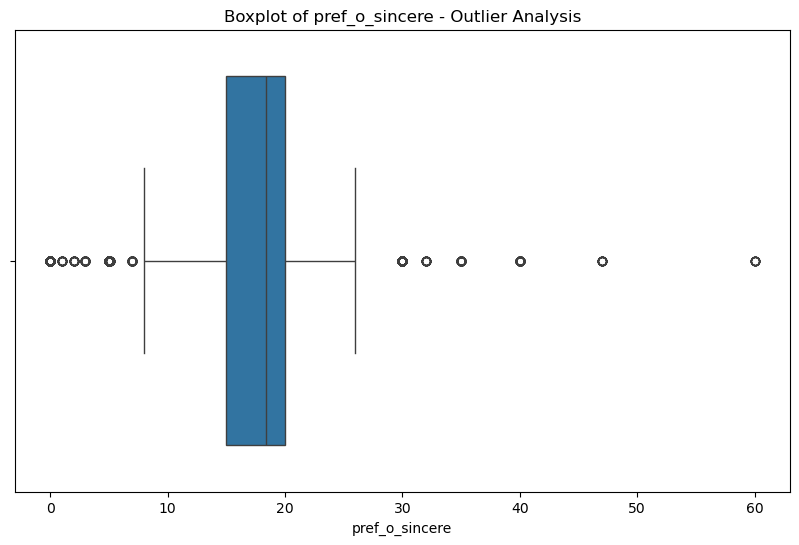

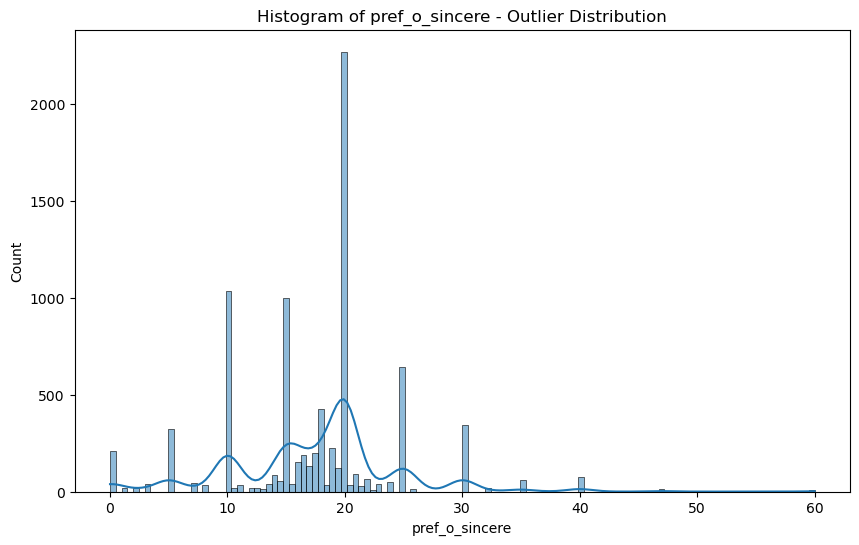

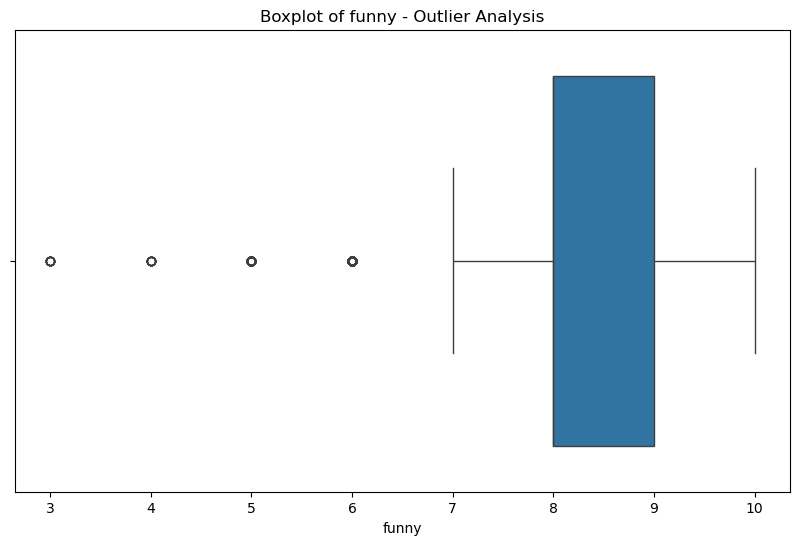

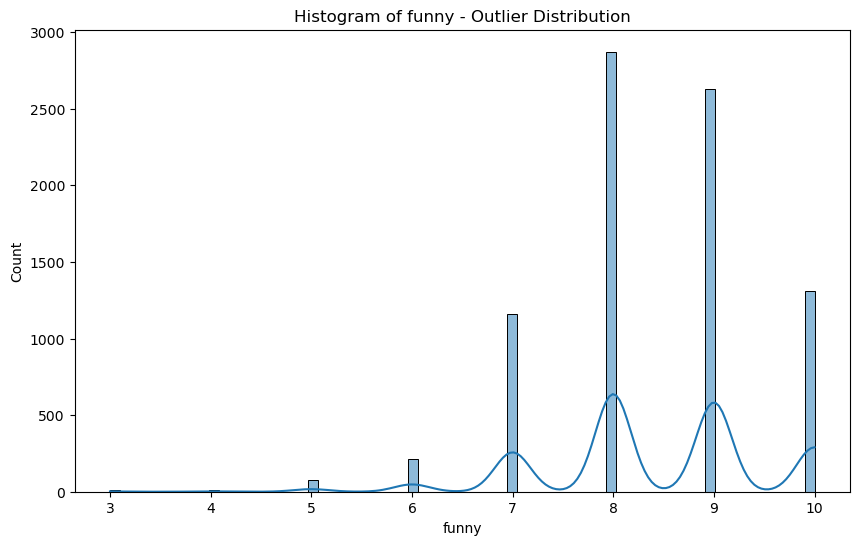

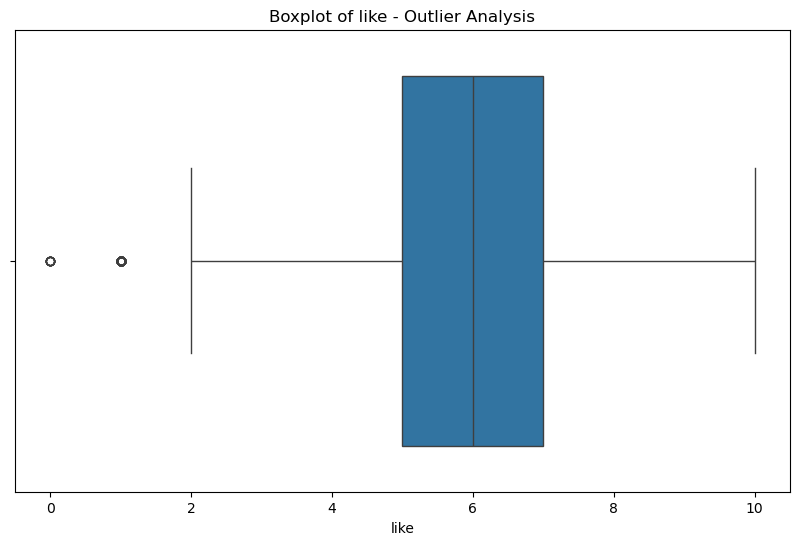

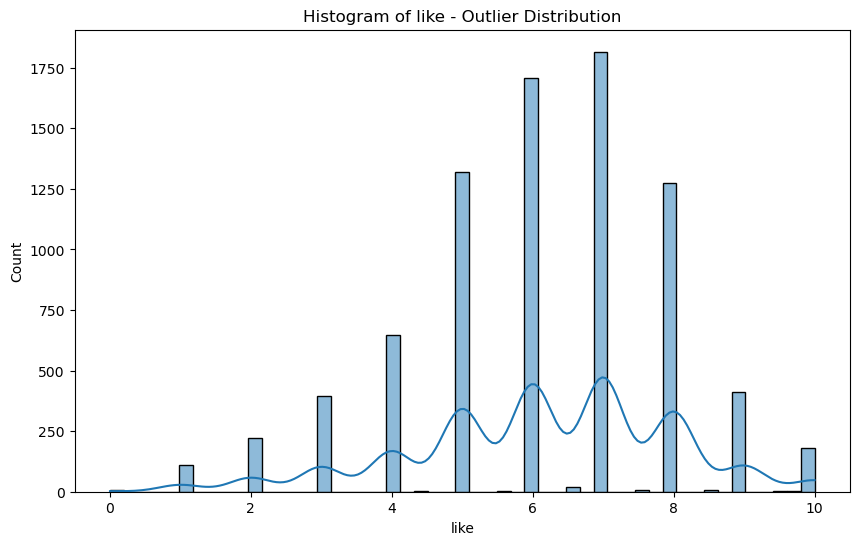

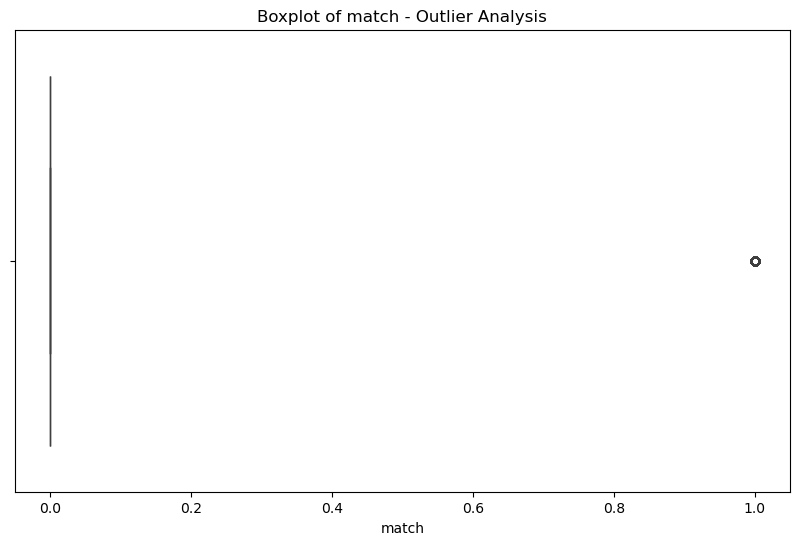

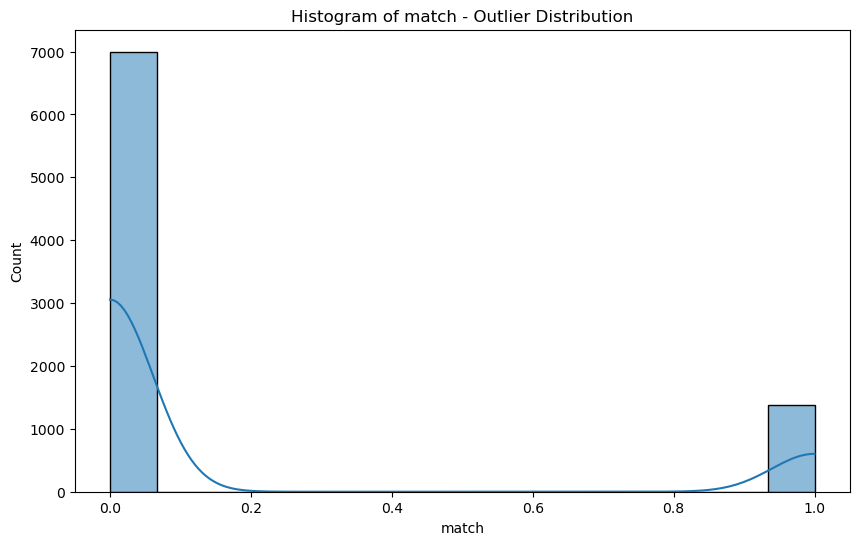

Data cleaning and outlier analysis complete. The cleaned dataset is saved as 'cleaned_speeddating.csv'.


In [6]:
# Define a function to detect outliers using IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Analyze Outliers
print("\nOutlier Analysis:\n")
outlier_counts = {}
for col in numeric_cols:
    outliers = detect_outliers(df[col])
    outlier_counts[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers detected")

# Step 6: Visualizing Outliers for Selected Columns
# Select top columns with the most outliers for visualization
selected_cols = ['age', 'pref_o_sincere', 'funny', 'like', 'match']

for col in selected_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} - Outlier Analysis")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col} - Outlier Distribution")
    plt.show()

# Save the cleaned dataset
df.to_csv('cleaned_speeddating.csv', index=False)

print("Data cleaning and outlier analysis complete. The cleaned dataset is saved as 'cleaned_speeddating.csv'.")


In [22]:
# Step 7: Outlier Handling and Adjustments
# -----------------------------------------
print("Applying Outlier Handling and Adjustments:")

# 1. Capping extreme values for 'pref_o_sincere'
pref_o_sincere_cap = df['pref_o_sincere'].quantile(0.95)
df['pref_o_sincere'] = np.where(df['pref_o_sincere'] > pref_o_sincere_cap, pref_o_sincere_cap, df['pref_o_sincere'])
print(f"Capped 'pref_o_sincere' at the 95th percentile: {pref_o_sincere_cap}")

# 2. Capping extreme values for 'funny'
funny_cap = df['funny'].quantile(0.95)
df['funny'] = np.where(df['funny'] > funny_cap, funny_cap, df['funny'])
print(f"Capped 'funny' at the 95th percentile: {funny_cap}")

# 3. Capping extreme values for 'like'
like_cap = df['like'].quantile(0.95)
df['like'] = np.where(df['like'] > like_cap, like_cap, df['like'])
print(f"Capped 'like' at the 95th percentile: {like_cap}")

# 4. Creating Age Group Indicator
age_threshold = 35
df['age_group'] = np.where(df['age'] >= age_threshold, 'older', 'young')
print("Created 'age_group' indicator based on age >= 35")

# Save the adjusted dataset
df.to_csv('adjusted_features_speeddating.csv', index=False)

print("Outlier handling and adjustments complete. The dataset is saved as 'adjusted_features_speeddating.csv'.")

print("Data cleaning, hypothesis testing, feature selection, and outlier handling complete. The dataset with selected and adjusted features is saved as 'adjusted_features_speeddating.csv'.")


Applying Outlier Handling and Adjustments:
Capped 'pref_o_sincere' at the 95th percentile: 30.0
Capped 'funny' at the 95th percentile: 10.0
Capped 'like' at the 95th percentile: 9.0
Created 'age_group' indicator based on age >= 35
Outlier handling and adjustments complete. The dataset is saved as 'adjusted_features_speeddating.csv'.
Data cleaning, hypothesis testing, feature selection, and outlier handling complete. The dataset with selected and adjusted features is saved as 'adjusted_features_speeddating.csv'.


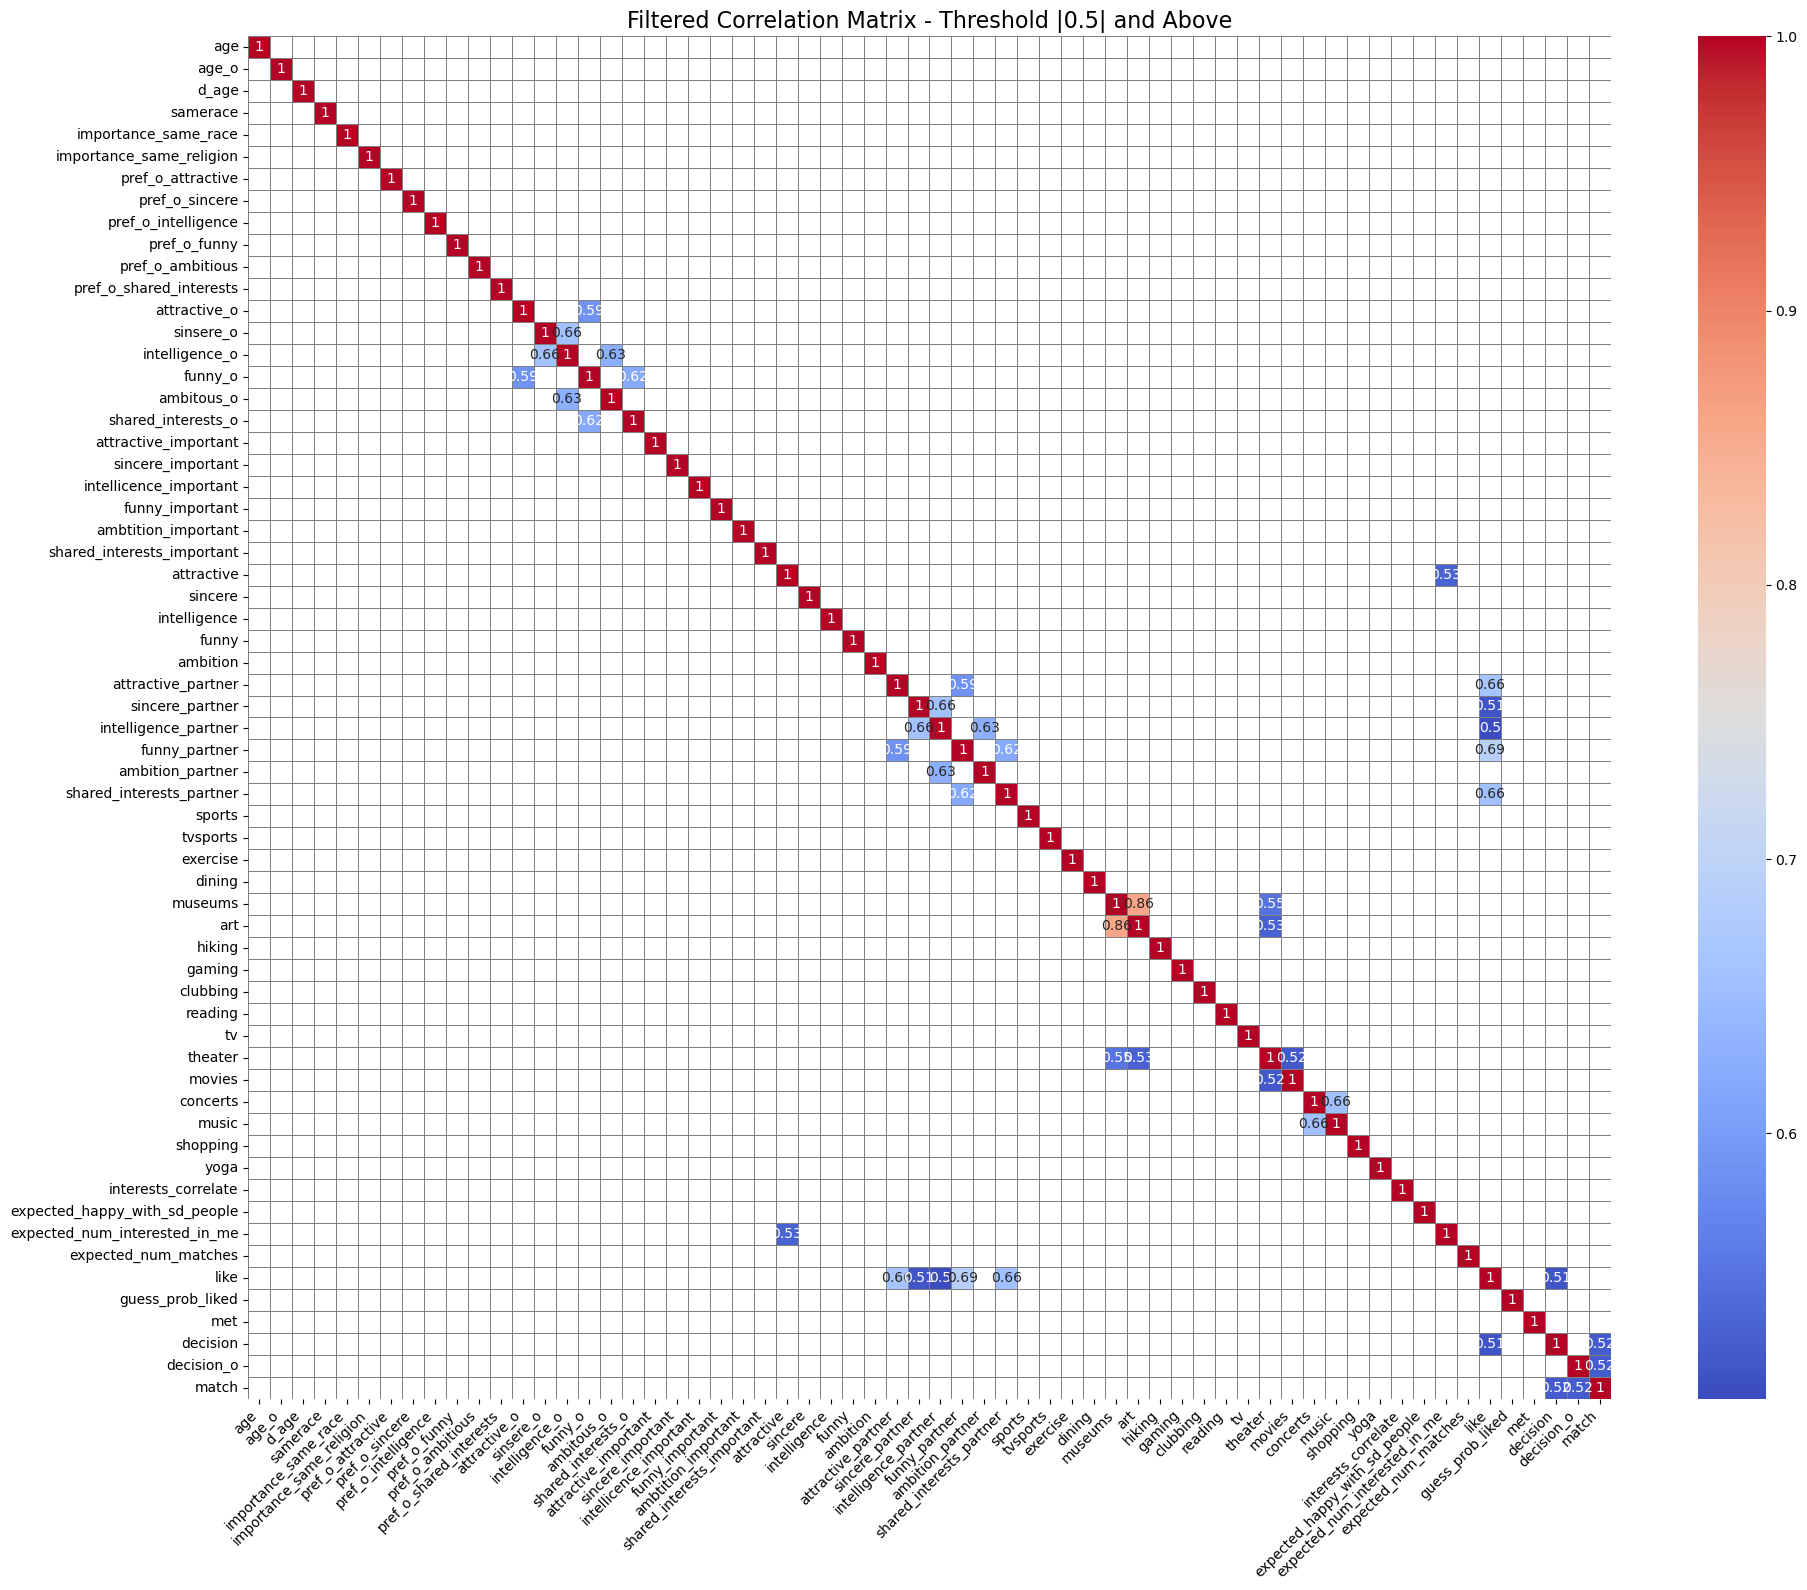

In [23]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Filter correlations above a certain threshold for clarity
threshold = 0.5
strong_corr = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Plot the heatmap with improved readability
plt.figure(figsize=(20, 16))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', cbar=True, square=True, 
            linewidths=0.5, linecolor='gray', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Filtered Correlation Matrix - Threshold |0.5| and Above", fontsize=16)
plt.tight_layout()
plt.show()


In [24]:
# Step 5: Hypothesis Testing
# --------------------------
print("\nHypothesis Testing:\n")

# 1. expected_num_matches vs. match
aligned_data = df[['expected_num_matches', 'match']].dropna()
corr, p_value = pearsonr(aligned_data['expected_num_matches'], aligned_data['match'])
print(f"Correlation between expected_num_matches and match: {corr:.2f}, P-Value: {p_value}")

# 2. guess_prob_liked vs. like
aligned_data = df[['guess_prob_liked', 'like']].dropna()
corr, p_value = pearsonr(aligned_data['guess_prob_liked'], aligned_data['like'])
print(f"Correlation between guess_prob_liked and like: {corr:.2f}, P-Value: {p_value}")

# 3. attractive_partner vs. like
aligned_data = df[['attractive_partner', 'like']].dropna()
corr, p_value = pearsonr(aligned_data['attractive_partner'], aligned_data['like'])
print(f"Correlation between attractive_partner and like: {corr:.2f}, P-Value: {p_value}")

# 4. attractive_partner vs. match
contingency_table = pd.crosstab(df['match'].dropna(), df['attractive_partner'].dropna())
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for attractive_partner vs. match: Chi2 = {chi2_stat:.2f}, P-Value: {p_value}")

# 5. funny_partner vs. like
aligned_data = df[['funny_partner', 'like']].dropna()
corr, p_value = pearsonr(aligned_data['funny_partner'], aligned_data['like'])
print(f"Correlation between funny_partner and like: {corr:.2f}, P-Value: {p_value}")


Hypothesis Testing:

Correlation between expected_num_matches and match: 0.13, P-Value: 8.89028721450531e-29
Correlation between guess_prob_liked and like: 0.46, P-Value: 0.0
Correlation between attractive_partner and like: 0.66, P-Value: 0.0
Chi-Square Test for attractive_partner vs. match: Chi2 = 612.94, P-Value: 4.110298540625463e-120
Correlation between funny_partner and like: 0.69, P-Value: 0.0


In [25]:
# Step 6: Feature Selection
# --------------------------
# Final feature selection based on statistical significance and correlation strength
selected_features = ['funny_partner', 'attractive_partner', 'guess_prob_liked', 'expected_num_matches']

print("\nSelected Features for Analysis:", selected_features)

# Save the dataset with selected features only
df[selected_features + ['like', 'match']].to_csv('selected_features_speeddating.csv', index=False)

print("Data cleaning, hypothesis testing, and feature selection complete. The dataset with selected features is saved as 'selected_features_speeddating.csv'.")


Selected Features for Analysis: ['funny_partner', 'attractive_partner', 'guess_prob_liked', 'expected_num_matches']
Data cleaning, hypothesis testing, and feature selection complete. The dataset with selected features is saved as 'selected_features_speeddating.csv'.
